In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [4]:
train.shape

(216, 4)

In [5]:
train.columns = ['Year','Month','ProductCategory','Sales']

In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [8]:
test.shape

(36, 4)

In [9]:
test.columns = ['Year','Month','ProductCategory','Sales']

In [10]:
macro = pd.read_excel('macro_economic.xlsx')

In [11]:
macro.head().T

,0,1,2,3,4
Year-Month,2009 - Jan,2009 - Feb,2009 - Mar,2009 - Apr,2009 - May
Monthly Nominal GDP Index (inMillion$),14421.8,14389.2,14340.7,14326.8,14345.9
Monthly Real GDP Index (inMillion$),14407.1,14366.2,14351.8,14351.6,14368.1
CPI,233.402,234.663,235.067,235.582,235.975
PartyInPower,Democrats,Democrats,Democrats,Democrats,Democrats
unemployment rate,7.8,8.3,8.7,9,9.4
CommercialBankInterestRateonCreditCardPlans,12.03,12.97,12.97,12.97,13.32
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",11.44,11.05,11.05,11.05,11.25
Earnings or wages in dollars per hour,22.05,22.22,22.22,22.13,22.04
AdvertisingExpenses (in Thousand Dollars),137,200,?,214,?


In [12]:
macro.shape

(96, 18)

In [13]:
macro.columns = ['Y/M','Monthly_Nominal_GDP','Monthly_Real_GDP','CPI','PartyInPower','unemployment_Rate','CommercialBankInterest_CCplans','FinancialRateonPersonalLoansatCBanks','EarningsPerhour','AdExpenses','CottonMonthlyPrice','change','Avg_upland_planted','Avg_upland_harvested','Yieldperharvestedacre','Production','Mill_use','Exports']

In [14]:
macro=macro[:84]

In [15]:
macro.tail()

,Y/M,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,PartyInPower,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,AdExpenses,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports
79,2015 - Aug,18201.392888,16505.537615,261.347,Democrats,5.1,12.10,9.80,25.04,?,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475
80,2015 - Sep,18317.816120,16601.489879,261.887,Democrats,5.0,12.10,9.80,25.05,?,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700
81,2015 - Oct,18278.304270,16540.859723,261.515,Democrats,5.0,12.10,9.80,25.14,183,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700
82,2015 - Nov,18266.244605,16524.199494,261.009,Democrats,5.0,12.22,9.66,25.38,?,69.22,0.28,8.398,7.995,770,12.830,3.675,9.700
83,2015 - Dec,18317.129125,16578.004544,259.941,Democrats,5.0,12.22,9.66,25.21,?,70.39,1.69,8.398,7.995,755,12.580,3.675,9.500


In [16]:
sales = pd.DataFrame(np.repeat(macro.values,3,axis=0))

In [17]:
sales.columns = macro.columns

In [18]:
sales.head()

,Y/M,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,PartyInPower,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,AdExpenses,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports
0,2009 - Jan,14421.8,14407.1,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.7,4.02,9.296,7.559,799,12.589,4.17,11.55
1,2009 - Jan,14421.8,14407.1,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.7,4.02,9.296,7.559,799,12.589,4.17,11.55
2,2009 - Jan,14421.8,14407.1,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.7,4.02,9.296,7.559,799,12.589,4.17,11.55
3,2009 - Feb,14389.2,14366.2,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.1
4,2009 - Feb,14389.2,14366.2,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.1


In [19]:
sales.shape

(252, 18)

In [20]:
Train_Test = pd.concat([train,test],axis=0,ignore_index=True)

In [21]:
Train_Test.shape

(252, 4)

In [22]:
Train_Test.tail()

,Year,Month,ProductCategory,Sales
247,2015,11,MenClothing,NaN
248,2015,11,OtherClothing,NaN
249,2015,12,WomenClothing,NaN
250,2015,12,MenClothing,NaN
251,2015,12,OtherClothing,NaN


In [23]:
sales_new=pd.concat([sales,Train_Test],axis=1)

In [24]:
sales_new.shape

(252, 22)

In [25]:
sales_new.head()

,Y/M,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,PartyInPower,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,AdExpenses,...,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports,Year,Month,ProductCategory,Sales
0,2009 - Jan,14421.8,14407.1,233.402,Democrats,7.8,12.03,11.44,22.05,137,...,9.296,7.559,799,12.589,4.17,11.55,2009,1,WomenClothing,1755.0
1,2009 - Jan,14421.8,14407.1,233.402,Democrats,7.8,12.03,11.44,22.05,137,...,9.296,7.559,799,12.589,4.17,11.55,2009,1,MenClothing,524.0
2,2009 - Jan,14421.8,14407.1,233.402,Democrats,7.8,12.03,11.44,22.05,137,...,9.296,7.559,799,12.589,4.17,11.55,2009,1,OtherClothing,936.0
3,2009 - Feb,14389.2,14366.2,234.663,Democrats,8.3,12.97,11.05,22.22,200,...,9.296,7.559,799,12.589,3.87,11.1,2009,2,WomenClothing,1729.0
4,2009 - Feb,14389.2,14366.2,234.663,Democrats,8.3,12.97,11.05,22.22,200,...,9.296,7.559,799,12.589,3.87,11.1,2009,2,MenClothing,496.0


In [26]:
sales_new.drop(['Y/M','PartyInPower','Month','Year'], axis=1, inplace=True) # Dropping Unnecessary Columns

In [27]:
sales_new.head()

,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,AdExpenses,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports,ProductCategory,Sales
0,14421.8,14407.1,233.402,7.8,12.03,11.44,22.05,137,57.7,4.02,9.296,7.559,799,12.589,4.17,11.55,WomenClothing,1755.0
1,14421.8,14407.1,233.402,7.8,12.03,11.44,22.05,137,57.7,4.02,9.296,7.559,799,12.589,4.17,11.55,MenClothing,524.0
2,14421.8,14407.1,233.402,7.8,12.03,11.44,22.05,137,57.7,4.02,9.296,7.559,799,12.589,4.17,11.55,OtherClothing,936.0
3,14389.2,14366.2,234.663,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.1,WomenClothing,1729.0
4,14389.2,14366.2,234.663,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.1,MenClothing,496.0


In [28]:
sales_new.shape

(252, 18)

In [29]:
sales_new = sales_new.replace('?',np.nan)

In [30]:
sales_new = sales_new.drop(['AdExpenses'],axis=1)

In [31]:
sales_new.isnull().any() #null values are present in Adv Expenses and Sales

Monthly_Nominal_GDP                     False
Monthly_Real_GDP                        False
CPI                                     False
unemployment_Rate                       False
CommercialBankInterest_CCplans          False
FinancialRateonPersonalLoansatCBanks    False
EarningsPerhour                         False
CottonMonthlyPrice                      False
change                                  False
Avg_upland_planted                      False
Avg_upland_harvested                    False
Yieldperharvestedacre                   False
Production                              False
Mill_use                                False
Exports                                 False
ProductCategory                         False
Sales                                    True
dtype: bool

In [32]:
sales_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
Monthly_Nominal_GDP                     252 non-null float64
Monthly_Real_GDP                        252 non-null float64
CPI                                     252 non-null float64
unemployment_Rate                       252 non-null float64
CommercialBankInterest_CCplans          252 non-null float64
FinancialRateonPersonalLoansatCBanks    252 non-null float64
EarningsPerhour                         252 non-null float64
CottonMonthlyPrice                      252 non-null float64
change                                  252 non-null float64
Avg_upland_planted                      252 non-null float64
Avg_upland_harvested                    252 non-null float64
Yieldperharvestedacre                   252 non-null int64
Production                              252 non-null float64
Mill_use                                252 non-null float64
Exports                                 252

In [33]:
sales_new.corr()

,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports,Sales
Monthly_Nominal_GDP,1.000000,0.997417,0.959235,-0.956152,-0.783370,-0.835155,0.986787,-0.208562,-0.226574,0.019362,0.032540,-0.090667,0.015870,0.299169,-0.488749,0.225384
Monthly_Real_GDP,0.997417,1.000000,0.943493,-0.948336,-0.750267,-0.828176,0.982099,-0.203163,-0.214482,0.009822,0.049176,-0.104249,0.028663,0.298861,-0.471631,0.227035
CPI,0.959235,0.943493,1.000000,-0.878050,-0.850575,-0.807173,0.949390,-0.124470,-0.294738,0.177438,0.065272,-0.034133,0.057672,0.193833,-0.473436,0.209394
unemployment_Rate,-0.956152,-0.948336,-0.878050,1.000000,0.787367,0.810887,-0.946724,0.338302,0.217833,0.114162,0.099836,0.096189,0.109757,-0.423596,0.552044,-0.201628
CommercialBankInterest_CCplans,-0.783370,-0.750267,-0.850575,0.787367,1.000000,0.630589,-0.772433,0.260326,0.347630,-0.327250,-0.030378,0.016207,-0.020746,-0.287147,0.507587,-0.166365
FinancialRateonPersonalLoansatCBanks,-0.835155,-0.828176,-0.807173,0.810887,0.630589,1.000000,-0.841899,0.271466,0.058342,0.101536,0.172467,-0.052760,0.132691,-0.120945,0.441278,-0.150551
EarningsPerhour,0.986787,0.982099,0.949390,-0.946724,-0.772433,-0.841899,1.000000,-0.190196,-0.179780,0.009455,0.001798,-0.100621,-0.016802,0.268760,-0.490970,0.212916
CottonMonthlyPrice,-0.208562,-0.203163,-0.124470,0.338302,0.260326,0.271466,-0.190196,1.000000,0.135434,0.294267,0.519094,0.208716,0.532459,0.009362,0.715185,0.009490
change,-0.226574,-0.214482,-0.294738,0.217833,0.347630,0.058342,-0.179780,0.135434,1.000000,-0.248174,0.012743,0.154055,0.045368,-0.285562,0.320149,-0.054545
Avg_upland_planted,0.019362,0.009822,0.177438,0.114162,-0.327250,0.101536,0.009455,0.294267,-0.248174,1.000000,0.605732,-0.021148,0.549069,-0.054768,0.111429,0.073188


In [34]:
med = sales_new['Sales'].median()
med

1080.5

In [35]:
sales_new['Sales'].fillna(med,inplace=True)

In [36]:
sales_new.isnull().any()

Monthly_Nominal_GDP                     False
Monthly_Real_GDP                        False
CPI                                     False
unemployment_Rate                       False
CommercialBankInterest_CCplans          False
FinancialRateonPersonalLoansatCBanks    False
EarningsPerhour                         False
CottonMonthlyPrice                      False
change                                  False
Avg_upland_planted                      False
Avg_upland_harvested                    False
Yieldperharvestedacre                   False
Production                              False
Mill_use                                False
Exports                                 False
ProductCategory                         False
Sales                                   False
dtype: bool

In [37]:
def outlier_detect(X):
    for i in X.describe().columns:
        Q1=X.describe().at['25%',i]
        Q3=X.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(X[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(X[i].median())
            else:
                p.append(j)
        X[i]=p
    return X


outlier_detect(sales_new)

,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports,ProductCategory,Sales
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,3.5675,11.550,WomenClothing,1755.0
1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,3.5675,11.550,MenClothing,524.0
2,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,3.5675,11.550,OtherClothing,936.0
3,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.8700,11.100,WomenClothing,1729.0
4,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.8700,11.100,MenClothing,496.0
5,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.8700,11.100,OtherClothing,859.0
6,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799.0,12.589,3.7200,11.650,WomenClothing,2256.0
7,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799.0,12.589,3.7200,11.650,MenClothing,542.0
8,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799.0,12.589,3.7200,11.650,OtherClothing,921.0
9,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787.0,12.400,3.6200,12.225,WomenClothing,2662.0


In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(sales_new['ProductCategory'])
sales_new['ProductCategory'] = le.transform(sales_new['ProductCategory'])

In [39]:
sales_new.head()

,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports,ProductCategory,Sales
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,3.5675,11.55,2,1755.0
1,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,3.5675,11.55,0,524.0
2,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799.0,12.589,3.5675,11.55,1,936.0
3,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.8700,11.10,2,1729.0
4,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799.0,12.589,3.8700,11.10,0,496.0


In [40]:
sales_new.shape

(252, 17)

In [41]:
x = sales_new.drop(['Sales'],axis = 1)

In [42]:
x.shape

(252, 16)

In [43]:
names = x.columns
scaler = preprocessing.scale(x)
X = pd.DataFrame(scaler, columns=names)
Y = sales_new['Sales']

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  


In [44]:
X.head()

,Monthly_Nominal_GDP,Monthly_Real_GDP,CPI,unemployment_Rate,CommercialBankInterest_CCplans,FinancialRateonPersonalLoansatCBanks,EarningsPerhour,CottonMonthlyPrice,change,Avg_upland_planted,Avg_upland_harvested,Yieldperharvestedacre,Production,Mill_use,Exports,ProductCategory
0,-1.414961,-1.451750,-1.976245,-0.008402,-0.676839,1.736041,-1.540045,-1.784527,0.849482,-0.89874,-1.15215,0.301203,-1.040479,0.093906,0.940887,1.224745
1,-1.414961,-1.451750,-1.976245,-0.008402,-0.676839,1.736041,-1.540045,-1.784527,0.849482,-0.89874,-1.15215,0.301203,-1.040479,0.093906,0.940887,-1.224745
2,-1.414961,-1.451750,-1.976245,-0.008402,-0.676839,1.736041,-1.540045,-1.784527,0.849482,-0.89874,-1.15215,0.301203,-1.040479,0.093906,0.940887,0.000000
3,-1.441081,-1.512607,-1.833026,0.312399,0.555423,0.972752,-1.362934,-1.959329,-0.998122,-0.89874,-1.15215,0.301203,-1.040479,2.104990,0.470288,1.224745
4,-1.441081,-1.512607,-1.833026,0.312399,0.555423,0.972752,-1.362934,-1.959329,-0.998122,-0.89874,-1.15215,0.301203,-1.040479,2.104990,0.470288,-1.224745


In [45]:
X.shape

(252, 16)

In [46]:
Y.head()

0    1755.0
1     524.0
2     936.0
3    1729.0
4     496.0
Name: Sales, dtype: float64

In [47]:
Y.shape

(252,)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(X)
#Change column names to Comp
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

In [49]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-2.990512,-2.202417,-0.194351,0.772252,1.224745e+00,0.638185,-1.144955,1.414778,-1.597539,-0.181596,0.733236,0.827652,-0.082088,-0.021465,0.070042,-0.011798
1,-2.990512,-2.202417,-0.194351,0.772252,-1.224745e+00,0.638185,-1.144955,1.414778,-1.597539,-0.181596,0.733236,0.827652,-0.082088,-0.021465,0.070042,-0.011798
2,-2.990512,-2.202417,-0.194351,0.772252,3.422435e-15,0.638185,-1.144955,1.414778,-1.597539,-0.181596,0.733236,0.827652,-0.082088,-0.021465,0.070042,-0.011798
3,-2.503554,-2.199835,-1.667461,2.339520,1.224745e+00,1.642898,-0.190672,0.990033,-0.302848,0.634806,0.258901,0.233018,0.182182,-0.047960,-0.049843,-0.001113
4,-2.503554,-2.199835,-1.667461,2.339520,-1.224745e+00,1.642898,-0.190672,0.990033,-0.302848,0.634806,0.258901,0.233018,0.182182,-0.047960,-0.049843,-0.001113


In [50]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[6.76634136e+00 3.01812587e+00 1.25501207e+00 1.22494726e+00
 1.00398406e+00 8.19595136e-01 7.26170158e-01 5.22934007e-01
 4.07978838e-01 1.64303456e-01 8.50642024e-02 3.56646067e-02
 1.55056345e-02 1.00340301e-02 7.88275729e-03 2.01560694e-04]
[4.21218175e-01 1.87884324e-01 7.81269914e-02 7.62553976e-02
 6.25000000e-02 5.10214234e-02 4.52055331e-02 3.25536795e-02
 2.53974922e-02 1.02282161e-02 5.29541538e-03 2.22019253e-03
 9.65256515e-04 6.24638284e-04 4.90717281e-04 1.25475531e-05]
[0.42121818 0.6091025  0.68722949 0.76348489 0.82598489 0.87700631
 0.92221184 0.95476552 0.98016302 0.99039123 0.99568665 0.99790684
 0.9988721  0.99949674 0.99998745 1.        ]


In [51]:
cumprop = np.cumsum(pca.explained_variance_ratio_)
cumprop

array([0.42121818, 0.6091025 , 0.68722949, 0.76348489, 0.82598489,
       0.87700631, 0.92221184, 0.95476552, 0.98016302, 0.99039123,
       0.99568665, 0.99790684, 0.9988721 , 0.99949674, 0.99998745,
       1.        ])

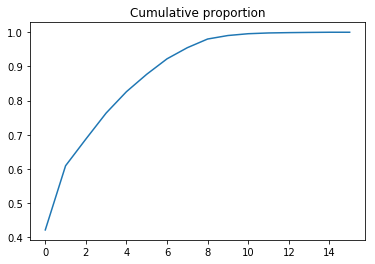

In [52]:
plt.plot(cumprop)
plt.title('Cumulative proportion')
plt.show()

In [53]:
#with 9 components

In [54]:
pca = PCA(n_components=9)
principalComponents9 = pca.fit_transform(X)
#Change column names to Comp
principalDf9 = pd.DataFrame(data = principalComponents9
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [55]:
cumprop = np.cumsum(pca.explained_variance_ratio_)
cumprop

array([0.42121818, 0.6091025 , 0.68722949, 0.76348489, 0.82598489,
       0.87700631, 0.92221184, 0.95476552, 0.98016302])

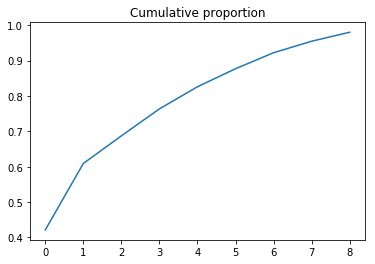

In [56]:
plt.plot(cumprop)
plt.title('Cumulative proportion')
plt.show()

In [57]:
X1 = principalDf9
Y1 = sales_new['Sales']

In [58]:
X_train = X1[:216]
Y1_train = Y1[:216]
X_train.shape

(216, 9)

In [59]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.990512,-2.202417,-0.194351,0.772252,1.224745e+00,0.638185,-1.144955,1.414778,-1.597539
1,-2.990512,-2.202417,-0.194351,0.772252,-1.224745e+00,0.638185,-1.144955,1.414778,-1.597539
2,-2.990512,-2.202417,-0.194351,0.772252,3.422435e-15,0.638185,-1.144955,1.414778,-1.597539
3,-2.503554,-2.199835,-1.667461,2.339520,1.224745e+00,1.642898,-0.190672,0.990033,-0.302848
4,-2.503554,-2.199835,-1.667461,2.339520,-1.224745e+00,1.642898,-0.190672,0.990033,-0.302848


In [60]:
Xtest = X1[216:]
Xtest.shape

(36, 9)

In [61]:
model = LinearRegression()
model.fit(X_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
y_predict = model.predict(Xtest)

y_predict

array([2370.87508583,  319.12508583, 1345.00008583, 2506.74104497,
        454.99104497, 1480.86604497, 2550.80626014,  499.05626014,
       1524.93126014, 2539.35252368,  487.60252368, 1513.47752368,
       2633.9007427 ,  582.1507427 , 1608.0257427 , 2561.08079042,
        509.33079042, 1535.20579042, 2588.49012652,  536.74012652,
       1562.61512652, 2568.25140927,  516.50140927, 1542.37640927,
       2581.40527214,  529.65527214, 1555.53027214, 2526.6493745 ,
        474.8993745 , 1500.7743745 , 2535.75834704,  484.00834704,
       1509.88334704, 2495.79122617,  444.04122617, 1469.91622617])

In [63]:
model.score(X_train,Y1_train)

0.6622004623423648

In [64]:
y_sales = pd.DataFrame(y_predict)

In [65]:
y_sales

,0
0,2370.875086
1,319.125086
2,1345.000086
3,2506.741045
4,454.991045
5,1480.866045
6,2550.806260
7,499.056260
8,1524.931260
9,2539.352524
